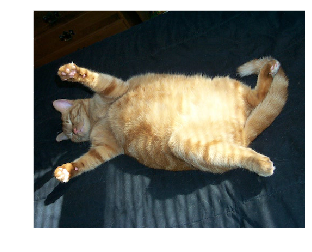

In [1]:
# 图片增强：通过一系列的随机变化，生成大量新的样本，从而减低过拟合的可能
# 在深度卷积神经网络当中，图片增强是必不可少的一部分

%matplotlib inline
import matplotlib.pyplot as plt
from mxnet import image

img =  image.imdecode(open('images/cat1.jpg', 'rb').read())
plt.imshow(img.asnumpy())

In [2]:
def apply(img, aug, n=3):
    _, figs = plt.subplots(n, n, figsize=(8, 8))
    for i in range(n):
        for j in range(n):
            x = img.astype('float32')
            y = aug(x).clip(0, 254)
            figs[i][j].imshow(y.asnumpy()/255.0)
            figs[i][j].axes.get_xaxis().set_visible(False)
            figs[i][j].axes.get_yaxis().set_visible(False)

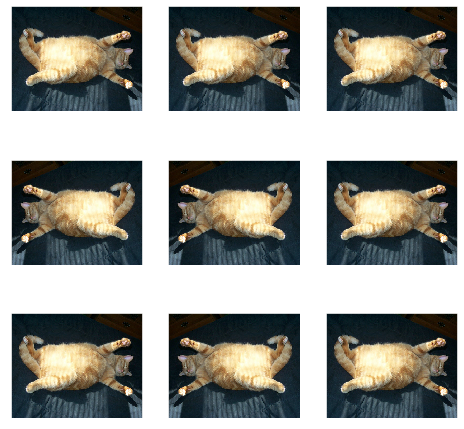

In [3]:
# 图像变形：水平方向翻转图片是使用最早，也是最广泛的一种增强

# 以0.5的概率进行翻转
aug = image.HorizontalFlipAug(0.5)
apply(img, aug)

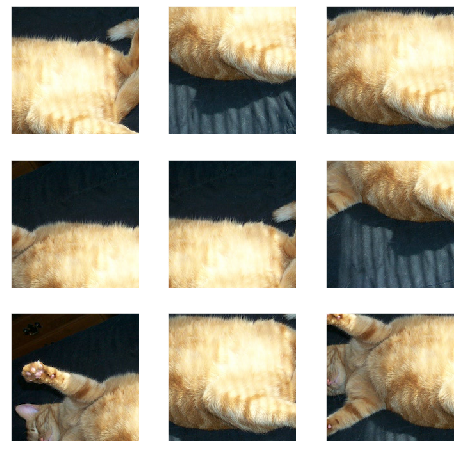

In [4]:
# 随机裁剪: 随机裁剪通常会缩小图片的尺寸。通常的做法是先将
# 原始图片放大到足后的尺寸，再进行裁剪。如果原始图片足够大，
# 通常不需要事先将其裁剪到网络需要的大小

# 随机裁剪200 × 200 的区域
aug = image.RandomCropAug([200, 200])
apply(img, aug)

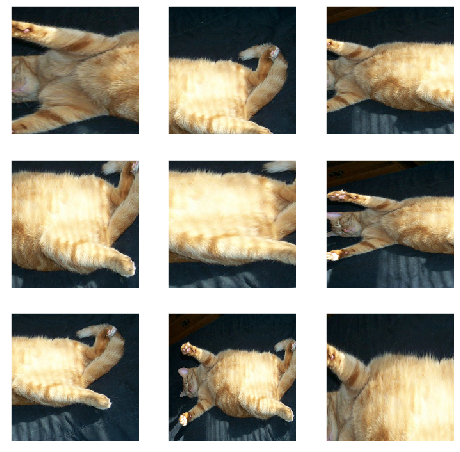

In [5]:
# 也可以在随机裁剪的时候，保留至少0.1的区域，随机长宽比在0.5到2之间
# 最后将结果resize到200 * 200

aug = image.RandomSizedCropAug((200, 200), 0.1, (0.5, 2))
apply(img, aug)

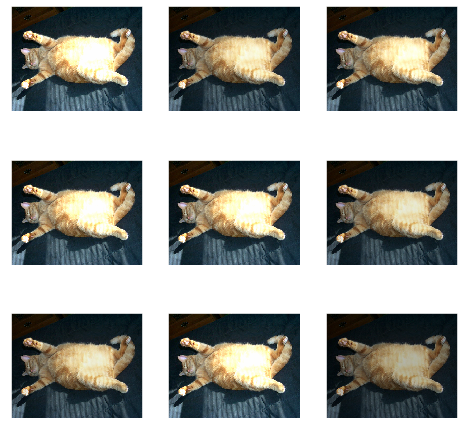

In [6]:
# 颜色变化也是图片增强的一种手段

# 将亮度随机增加或减少，按照0-0.5的概率

aug = image.BrightnessJitterAug(0.5)
apply(img, aug)

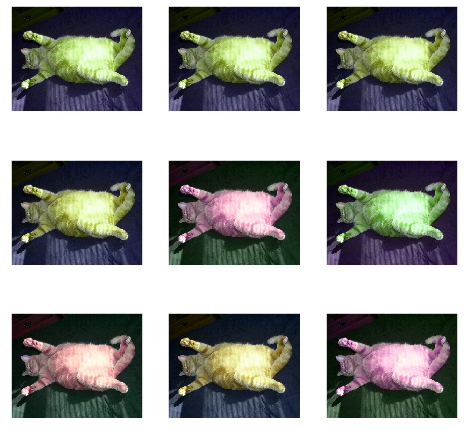

In [7]:
# 随机的色调变化

aug = image.HueJitterAug(0.5)
apply(img, aug)

In [8]:
def apply_aug_list(img, augs):
    for f in augs:
        img = f(img)
    return img

In [9]:
# 对于训练图片，应当应用随机翻转和裁剪；对于测试图片，则仅仅是中心裁剪。
# Cifar10图片是32 × 32 × 3， 将其裁剪为28 × 28 × 3

train_augs = (image.HorizontalFlipAug(0.5),
              image.RandomCropAug((28, 28)))
test_augs = (image.CenterCropAug(28, 28))

In [10]:
# 定义数据读取，与fashionminist类似，但是在transform当中加入图片增强

from mxnet import gluon
from mxnet import nd


def get_transform(augs):
    def _transform(data, label):
        data = data.astype('float32')
        if augs is not None:
            data = apply_aug_list(data, augs)
        data = nd.transpose(data, (2, 0, 1))/255
        return data, label.astype('float32')
    return _transform


def get_data(batch_size, train_augs, test_augs=None):
    cifar10_train = gluon.data.vision.CIFAR10(
        root='datasets', train=True, transform=get_transform(train_augs))
    cifar10_test = gluon.data.vision.CIFAR10(
        root='datasets', train=False, transform=get_transform(test_augs))
    train_data = gluon.data.DataLoader(
        cifar10_train, batch_size=batch_size, shuffle=True)
    test_data = gluon.data.DataLoader(
        cifar10_test, batch_size=batch_size, shuffle=False)
    return (train_data, test_data)

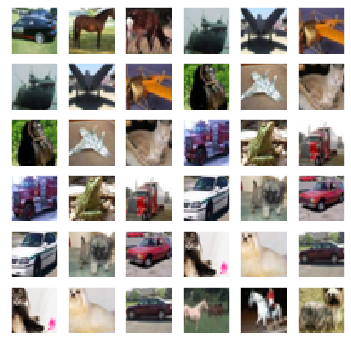

In [12]:
train_data, test_data = get_data(36, train_augs, test_augs)
for imgs, _ in train_data:
    break
_, figs = plt.subplots(6, 6, figsize=(6, 6))
for i in range(6):
    for j in range(6):
        x = nd.transpose(imgs[i*3 + j], (1, 2, 0))
        figs[i][j].imshow(x.asnumpy())
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)